In [122]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [123]:
df = pd.read_excel("Junior Data Analyst _ Data.xlsx")

In [124]:
df.head()

,Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0,1.509849
3,1,2020-01-01 01:00:00,0,1.411859
4,2,2020-01-01 02:00:00,0,1.023898


In [125]:
df.isnull().sum()

 Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.    1
Unnamed: 1                                                                                                    1
Unnamed: 2                                                                                                    0
Unnamed: 3                                                                                                    0
dtype: int64

In [126]:
data = pd.read_excel("Junior Data Analyst _ Data.xlsx", skiprows = 2)

In [127]:
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [128]:
data.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [129]:
data.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704
std,6.922582,2.026098,491.479806
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,46000.000000


In [130]:
data.columns


Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [131]:
hourly_avg = data.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']]

In [132]:
# hourly_avg

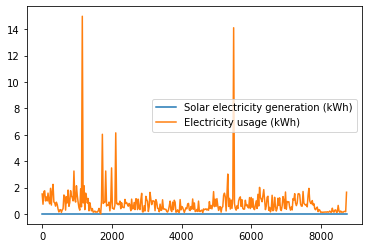

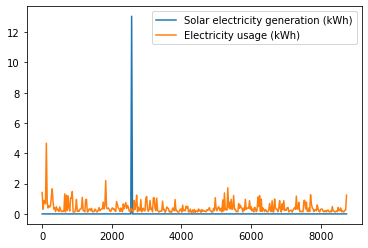

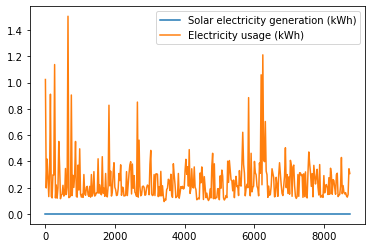

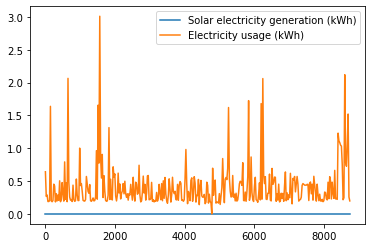

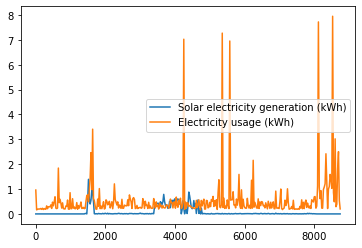

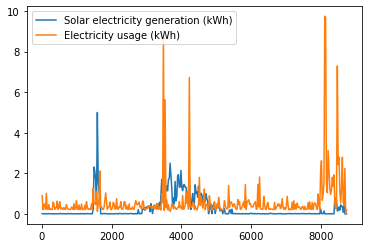

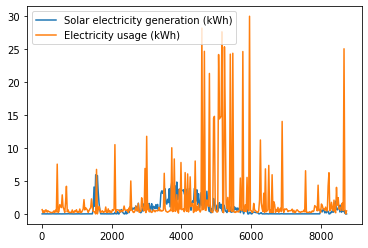

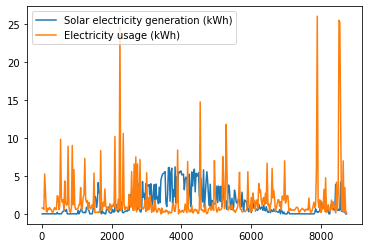

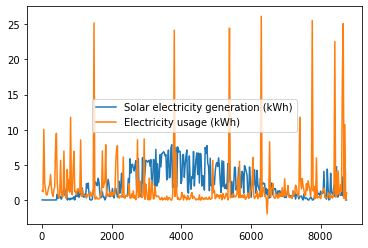

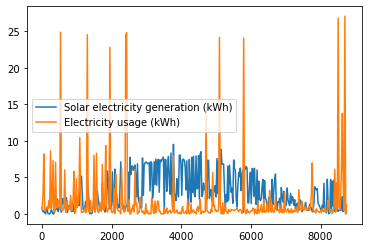

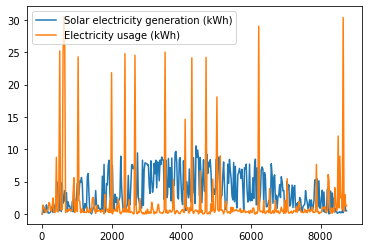

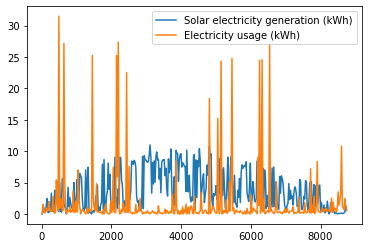

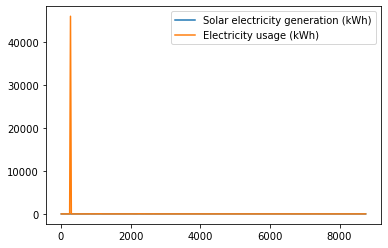

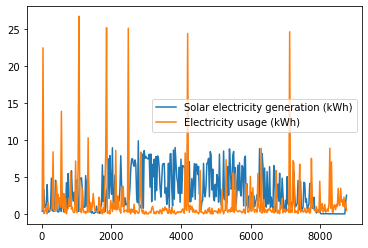

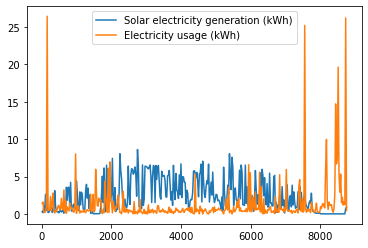

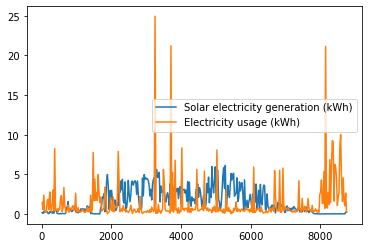

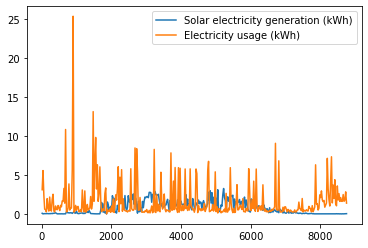

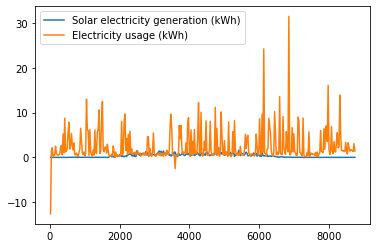

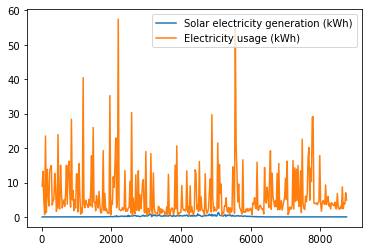

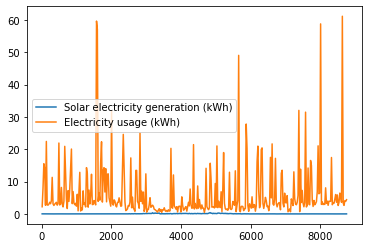

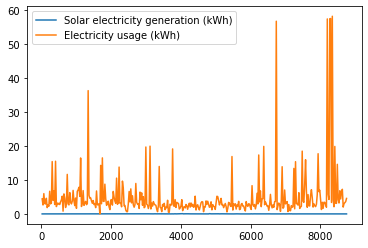

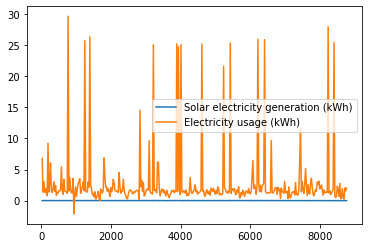

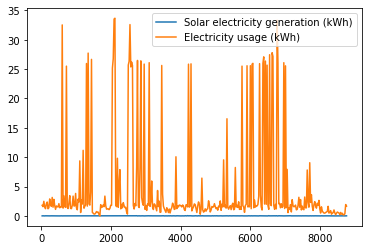

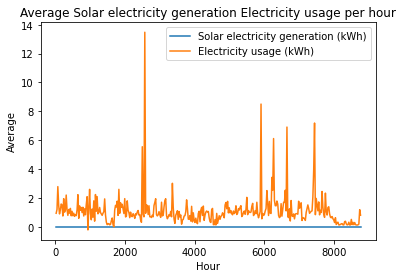

In [133]:
hourly_avg.plot(kind="line")
plt.xlabel("Hour")
plt.ylabel("Average") 
plt.title("Average Solar electricity generation Electricity usage per hour") 
plt.show()

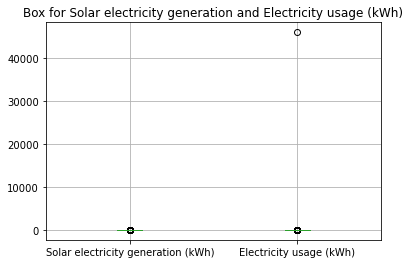

In [134]:
#Investigate outliers 
data.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title("Box for Solar electricity generation and Electricity usage (kWh)")
plt.show()

In [135]:
data.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [136]:
def identify_outliers(column): 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    IRQ  = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IRQ 
    
    upper_bound = Q3 + 1.5 * IRQ 
    
    return (column < lower_bound) | (column > upper_bound)

In [137]:
#Indentify and remove outliers
outlier_mask = identify_outliers(data['Solar electricity generation (kWh)'])
data  = data[~outlier_mask]

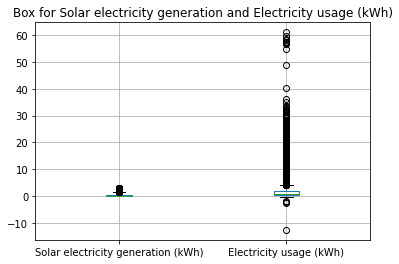

In [138]:
#Investigate outliers 
data.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title("Box for Solar electricity generation and Electricity usage (kWh)")
plt.show()

In [139]:
#Indentify and remove outliers
outlier_mask = identify_outliers(data['Electricity usage (kWh)'])
data  = data[~outlier_mask]

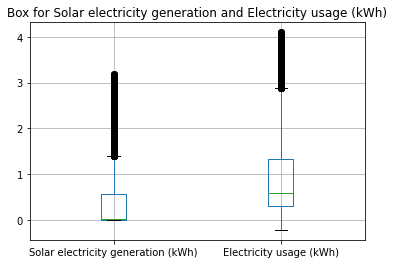

In [140]:
#Investigate outliers 
data.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title("Box for Solar electricity generation and Electricity usage (kWh)")
plt.show()

In [141]:
hourly_avg_cleaned = data.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']]

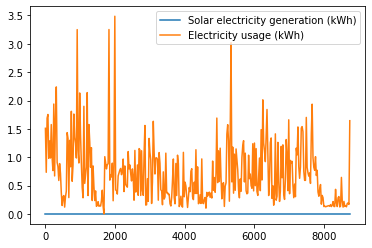

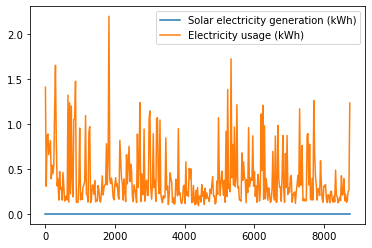

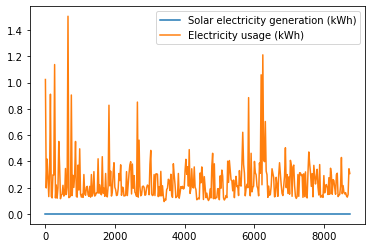

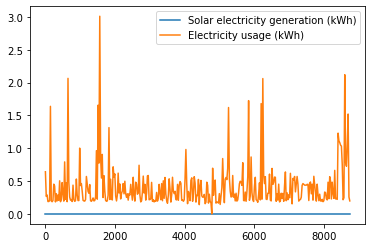

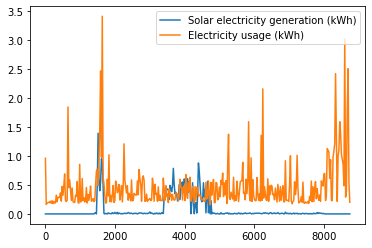

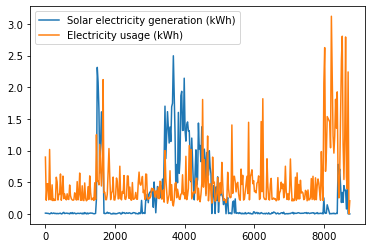

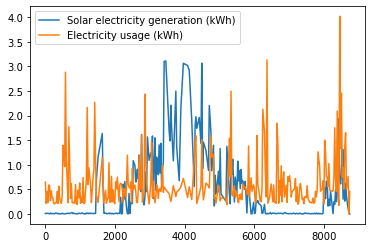

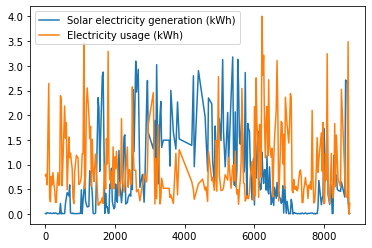

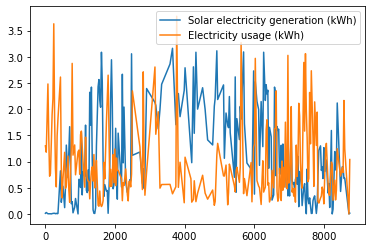

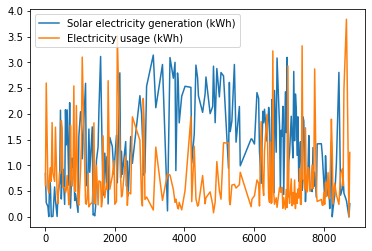

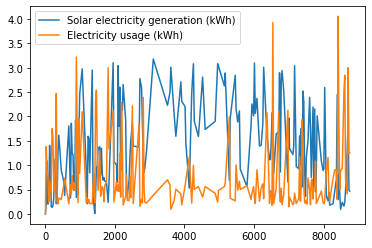

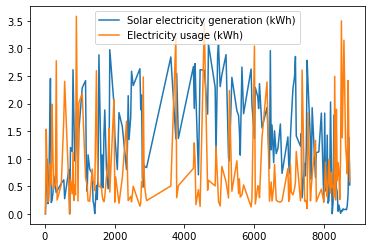

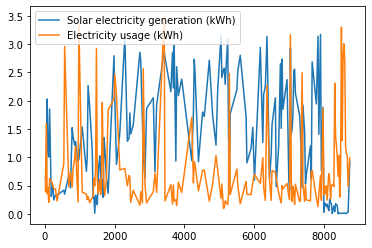

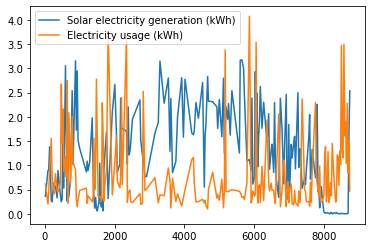

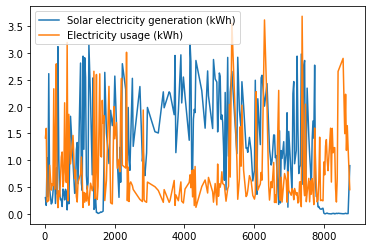

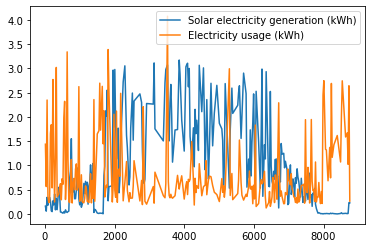

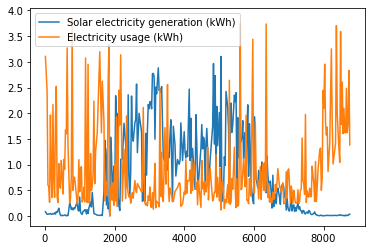

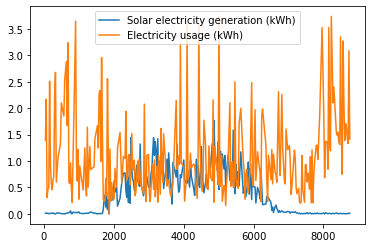

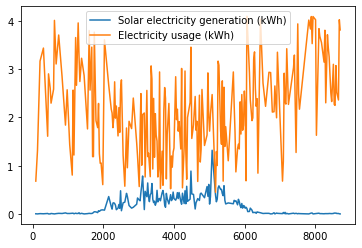

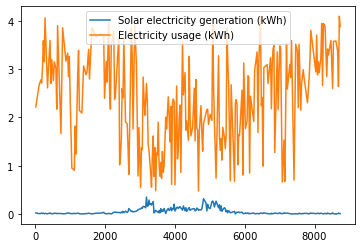

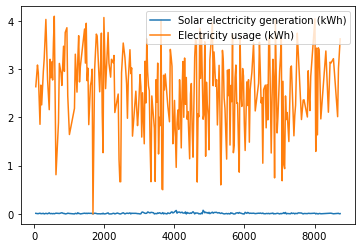

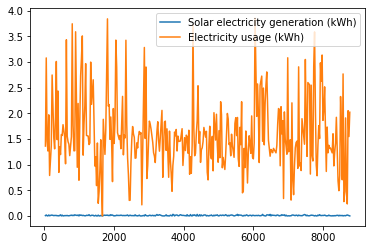

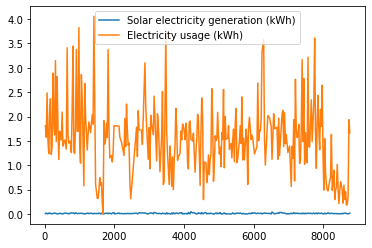

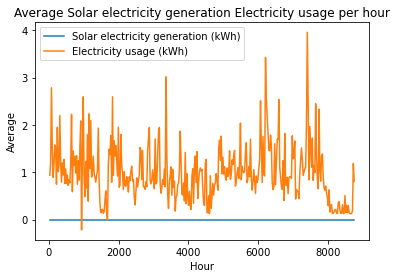

In [142]:
hourly_avg_cleaned.plot(kind="line")
plt.xlabel("Hour")
plt.ylabel("Average") 
plt.title("Average Solar electricity generation Electricity usage per hour") 
plt.show()

###  calculate the electricy bought, excess  solar generation, battery charge level, saving, projection,NVP and IRR 

In [143]:
# Step (ii): Calculate electricity needed to be bought from the provider
data['Electricity Bought'] = np.maximum(0, data['Electricity usage (kWh)'] - data['Solar electricity generation (kWh)'])

<IPython.core.display.Javascript object>

In [144]:
# Step (iii): Calculate excess solar electricity generated
data['Excess Solar Generation'] = np.maximum(0, data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)'])

<IPython.core.display.Javascript object>

In [145]:
# Step (iv): Model cumulative battery charge level
max_battery_capacity = 12.5  # kWh
data['Battery Charge Level'] = 0
for index, row in data.iterrows():
    excess_generation = row['Excess Solar Generation']
    battery_charge = min(max_battery_capacity - row['Battery Charge Level'], excess_generation)
    data.at[index, 'Battery Charge Level'] = row['Battery Charge Level'] + battery_charge

In [146]:
# Step (v): Calculate electricity bought with a battery
data['Electricity Bought with Battery'] = data['Electricity Bought'] - data['Excess Solar Generation']

In [147]:
# Step (vi): Calculate savings from installing a battery
electricity_price = 0.17  # $/kWh
data['Savings ($)'] = data['Electricity Bought'] * electricity_price - data['Electricity Bought with Battery'] * electricity_price


In [148]:

# Step (vii): Data Aggregation and Visualization
data['Month'] = data['Date/hour start'].dt.month
monthly_data = data.groupby('Month').agg({
    'Solar electricity generation (kWh)': 'sum',
    'Electricity usage (kWh)': 'sum',
    'Electricity Bought': 'sum',
    'Electricity Bought with Battery': 'sum'
}).reset_index()

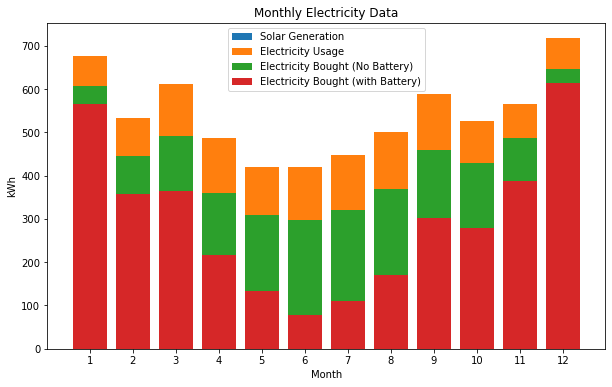

In [150]:
# Create a bar plot for monthly values
plt.figure(figsize=(10, 6))
plt.bar(monthly_data['Month'], monthly_data['Solar electricity generation (kWh)'], label='Solar Generation')
plt.bar(monthly_data['Month'], monthly_data['Electricity usage (kWh)'], label='Electricity Usage')
plt.bar(monthly_data['Month'], monthly_data['Electricity Bought'], label='Electricity Bought (No Battery)')
plt.bar(monthly_data['Month'], monthly_data['Electricity Bought with Battery'], label='Electricity Bought (with Battery)')
plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Monthly Electricity Data')
plt.legend()
plt.xticks(range(1, 13))
plt.show()